In [33]:
import pandas as pd 


In [56]:
# import yfinance as yf

# # Define the stock ticker (e.g., Apple - AAPL)
# ticker = "AAPL"

# # Download data (adjust the start and end dates as needed)
# df = yf.download(ticker, start="2000-01-01", end="2025-02-11")

# # Display the first few rows
# print(df.head())


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Adj Close, AAPL), (Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []


In [58]:
df=pd.read_csv("C:/Users/hp/Downloads/stock_data.xls")
#stock data from 2020 to 14 feb 2025(real data from yfinance)

In [31]:
#df.to_excel("C:/Users/hp/Downloads/stock_data.xls.xlsx", index=False)  # Saves as Excel without the index column


In [61]:
#preprocessing the data 
df.rename(columns={"Price": "Date"}, inplace=True)
df = df.iloc[1:].reset_index(drop=True)

In [64]:
df.tail()

,Date,Close,High,Low,Open,Volume
1283,2025-02-10,227.64999389648438,230.58999633789062,227.1999969482422,229.57000732421875,33115600
1284,2025-02-11,232.6199951171875,235.22999572753906,228.1300048828125,228.1999969482422,53718400
1285,2025-02-12,236.8699951171875,236.9600067138672,230.67999267578125,231.1999969482422,45243300
1286,2025-02-13,241.52999877929688,242.33999633789062,235.57000732421875,236.91000366210938,53614100
1287,2025-02-14,244.60000610351562,245.5500030517578,240.99000549316406,241.25,40838100


In [86]:
#filter only one price it may be closing, opening , low , high 
df1=df.reset_index()['Close']

In [88]:
print(df1.dtypes)

object


In [91]:
df1.shape

(1288,)

In [97]:
df1 = pd.to_numeric(df1, errors="coerce")  # Convert to float64.


In [98]:
df1


0        72.716057
1        72.009132
2        72.582916
3        72.241547
4        73.403648
           ...    
1283    227.649994
1284    232.619995
1285    236.869995
1286    241.529999
1287    244.600006
Name: Close, Length: 1288, dtype: float64

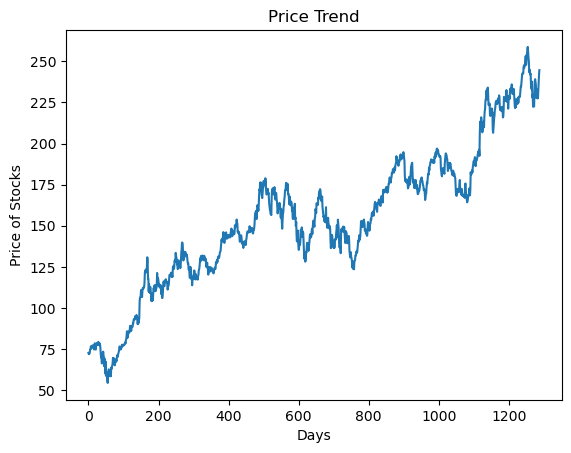

In [101]:
import matplotlib.pyplot as plt

plt.plot(df1)
plt.xlabel("no. of Days")  # Label for X-axis
plt.ylabel("Price of Stocks")  # Label for Y-axis
plt.title("Price Trend")  # Title of the graph
plt.show()

In [ ]:
##LSTM are sensitive to the scale of the data . So we apply MinMax scalar

In [102]:
import numpy as np


In [103]:
#Subodh Kumar
from sklearn.preprocessing import MinMaxScaler
#transforming values to 0:1 because in lstm dta should be normalize if not, optimal accuracy will not be achieved
scaler=MinMaxScaler(feature_range=(0,1))
#Converts df1 (a Pandas Series) into a NumPy array.
#.reshape(-1,1) ensures the data is in 2D format (required by MinMaxScaler).
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [104]:
df1

array([[0.08941485],
       [0.08595437],
       [0.08876311],
       ...,
       [0.89296599],
       [0.91577721],
       [0.93080522]])

In [105]:
#splitting dataset into train and test split 
#70% of the data in training and 30 of the data in test.
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
#subodh kumar
#train_data contains from 0 to training_size and test_data contains training_size to len(df1)
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [106]:
training_size,test_size

(901, 387)

In [107]:
train_data

array([[0.08941485],
       [0.08595437],
       [0.08876311],
       [0.08709207],
       [0.09278068],
       [0.10041293],
       [0.10124255],
       [0.10909985],
       [0.10402742],
       [0.10243951],
       [0.10706143],
       [0.11119754],
       [0.10863761],
       [0.10997686],
       [0.11179004],
       [0.11069974],
       [0.09960691],
       [0.10996506],
       [0.11784607],
       [0.11728912],
       [0.10027071],
       [0.09926332],
       [0.11133975],
       [0.11442104],
       [0.11887718],
       [0.11363833],
       [0.11544404],
       [0.11313934],
       [0.12215584],
       [0.11938789],
       [0.11948305],
       [0.11241478],
       [0.1179031 ],
       [0.1139591 ],
       [0.10534646],
       [0.08768185],
       [0.07568373],
       [0.08111249],
       [0.05838713],
       [0.05819718],
       [0.08843031],
       [0.07715665],
       [0.09309891],
       [0.08143337],
       [0.07681216],
       [0.04965592],
       [0.07242867],
       [0.060

In [108]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [109]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [112]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(800, 100, 1)
(800,)
(286, 100, 1)
(286,)


(None, None)

In [111]:
# reshape input to be [samples, time steps, features] which is required for LSTM
#Why is This Important?
#->LSTM expects a 3D input format to recognize temporal dependencies.
#->This ensures compatibility with the Keras LSTM layer.
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [114]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 390.0/390.0 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 6.9 MB/s eta 0:00:00
     -------------------------------------- 126.6/126.6 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 3.9 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 5.5/5.5 MB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 6.5 MB/s eta 0:00:00
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
     ---------------------------------------- 15.9/15.9 MB 6.5 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 4.3/4.3 MB 6.0 MB/s eta 0:00:00
  Using cached absl_py-2

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
scipy 1.10.0 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.0.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 2.0.2 which is incompatible.


In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [116]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [117]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 274ms/step - loss: 0.0865 - val_loss: 0.0517
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - loss: 0.0090 - val_loss: 0.0073
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - loss: 0.0043 - val_loss: 0.0258
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 0.0027 - val_loss: 0.0208
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 0.0021 - val_loss: 0.0088
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 0.0016 - val_loss: 0.0048
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 

In [120]:
import tensorflow as tf


In [121]:
tf.__version__


'2.18.0'

In [122]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


In [123]:
##Transformback to original form
#Since the data was scaled using MinMaxScaler(feature_range=(0,1)), the predictions are in a 
#normalized form (between 0 and 1). To get the actual stock prices, we need to inverse transform them back.
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [124]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.85812624544076

In [125]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

208.58974408836895

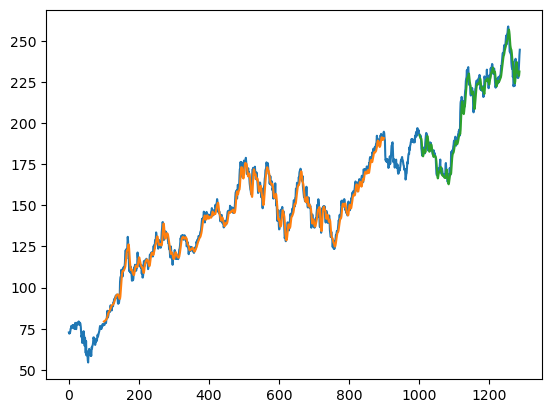

In [126]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [127]:
len(test_data)


387

In [164]:

x_input=test_data[287:].reshape(1,-1)
x_input.shape

(1, 100)

In [165]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [166]:
temp_input


[0.8396223441451047,
 0.8440182753859371,
 0.8391339239391034,
 0.844750943041644,
 0.846069655189825,
 0.8715172517127572,
 0.8383524814868648,
 0.8411365289464598,
 0.835714833110274,
 0.8412342279263421,
 0.8162751263028207,
 0.836203328009685,
 0.8546173449151937,
 0.8521751691917767,
 0.8448974915114673,
 0.863213809437094,
 0.8756689355038836,
 0.8655582861806286,
 0.8673654932282207,
 0.8812858799130148,
 0.8885147827967932,
 0.8854864878874926,
 0.8605762357539126,
 0.8596483195252607,
 0.8637510791330365,
 0.8734709325367631,
 0.8747897193783536,
 0.8573525428848476,
 0.8368871461754508,
 0.8222340171415399,
 0.8178380859007075,
 0.8248715908247213,
 0.821306026219478,
 0.8445555450818796,
 0.8432353390655047,
 0.8298863569648838,
 0.8298863569648838,
 0.8342382190939956,
 0.8493964249642703,
 0.8336514276674247,
 0.8484184641511221,
 0.8496897459841459,
 0.8532103451567523,
 0.8508633288372878,
 0.8574644336125721,
 0.8721336217295674,
 0.8828421171040288,
 0.8822064761875168

In [167]:

# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9041689]
101
1 day input [0.84401828 0.83913392 0.84475094 0.84606966 0.87151725 0.83835248
 0.84113653 0.83571483 0.84123423 0.81627513 0.83620333 0.85461734
 0.85217517 0.84489749 0.86321381 0.87566894 0.86555829 0.86736549
 0.88128588 0.88851478 0.88548649 0.86057624 0.85964832 0.86375108
 0.87347093 0.87478972 0.85735254 0.83688715 0.82223402 0.81783809
 0.82487159 0.82130603 0.84455555 0.84323534 0.82988636 0.82988636
 0.83423822 0.84939642 0.83365143 0.84841846 0.84968975 0.85321035
 0.85086333 0.85746443 0.87213362 0.88284212 0.88220648 0.89394186
 0.9049926  0.91995518 0.92171548 0.92186218 0.92088422 0.94000312
 0.94499062 0.93873176 0.94591973 0.94675092 0.96098001 0.97291094
 0.94635975 0.95486785 0.97784967 0.98166366 0.99599061 1.
 0.98322834 0.96665216 0.95794843 0.92582295 0.92342693 0.93144609
 0.91780379 0.92019965 0.89159477 0.87961491 0.87413839 0.89658227
 0.84959197 0.8580023  0.82211167 0.82793044 0.82709925 0.82279623
 0.85741551 0.89848927 0.90386801 0.895213

In [168]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [169]:
len(df1)


1288

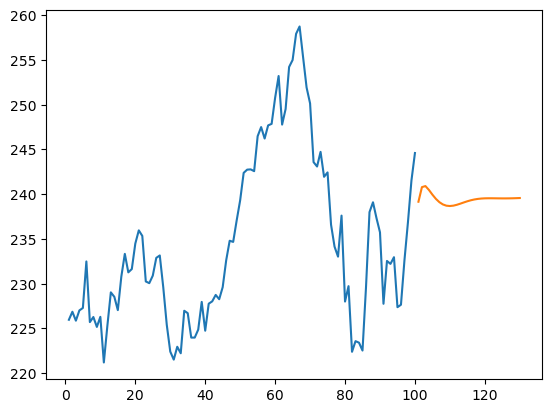

In [170]:

plt.plot(day_new,scaler.inverse_transform(df1[1188:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

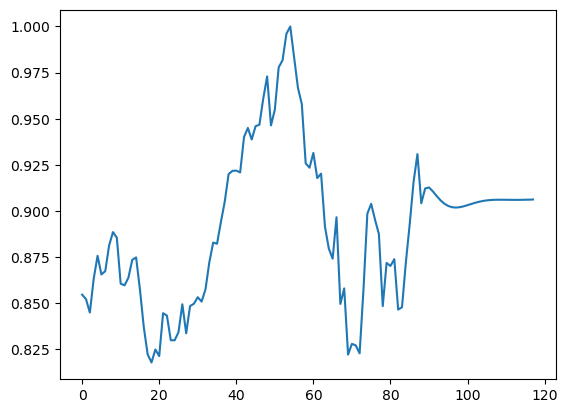

In [171]:

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [155]:
#subodh Kumar
df3=scaler.inverse_transform(df3).tolist()
